In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# nltk.download('all')

plt.style.use('ggplot')

In [2]:
# read the data
reviews = pd.read_csv("Reviews.csv")
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# downsize the dataset
print(reviews.shape)
reviews = reviews.head(1000)

(568454, 10)


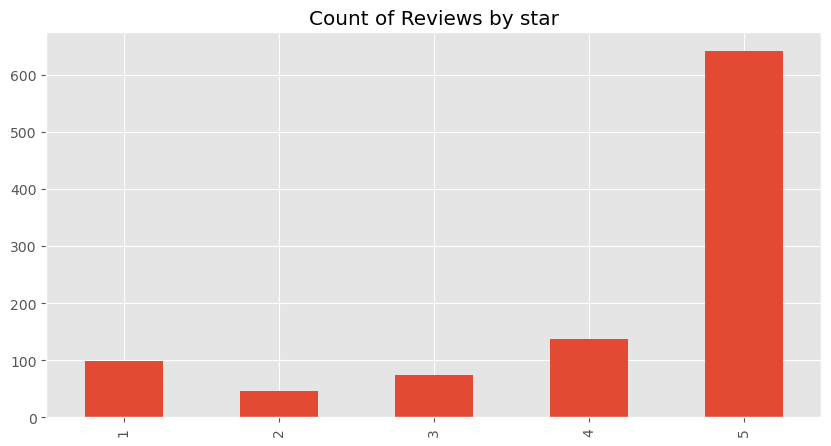

In [4]:
# visualize the data
axes = reviews['Score'].value_counts().sort_index() \
        .plot(kind = 'bar',
              title = 'Count of Reviews by star',
              figsize = (10,5))
axes.set_label('Review Stars')
plt.show()

In [5]:
# Play with NLTK
example = reviews['Text'][35]
print(example)

McCann's Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)<br /><br />I'm a fan of the McCann's steel-cut oats, so I thought I'd give the instant variety a try. I found it to be a hardy meal, not too sweet, and great for folks like me (post-bariatric surgery) who need food that is palatable, easily digestible, with fiber but won't make you bloat.


In [6]:
# tokenize
tokens = nltk.word_tokenize(example)
tokens[:10]

['McCann',
 "'s",
 'Instant',
 'Irish',
 'Oatmeal',
 ',',
 'Variety',
 'Pack',
 'of',
 'Regular']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('McCann', 'NNP'),
 ("'s", 'POS'),
 ('Instant', 'NNP'),
 ('Irish', 'NNP'),
 ('Oatmeal', 'NNP'),
 (',', ','),
 ('Variety', 'NNP'),
 ('Pack', 'NNP'),
 ('of', 'IN'),
 ('Regular', 'NNP')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON McCann/NNP)
  's/POS
  (ORGANIZATION Instant/NNP Irish/NNP Oatmeal/NNP)
  ,/,
  (PERSON Variety/NNP Pack/NNP)
  of/IN
  (GPE Regular/NNP)
  ,/,
  (PERSON Apples/NNP)
  &/CC
  (PERSON Cinnamon/NNP)
  ,/,
  and/CC
  (PERSON Maple/NNP)
  &/CC
  (PERSON Brown/NNP Sugar/NNP)
  ,/,
  10-Count/JJ
  (GPE Boxes/NNP)
  (/(
  (ORGANIZATION Pack/NNP)
  of/IN
  6/CD
  )/)
  </NN
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  I/PRP
  'm/VBP
  a/DT
  fan/NN
  of/IN
  the/DT
  (ORGANIZATION McCann/NNP)
  's/POS
  steel-cut/JJ
  oats/NNS
  ,/,
  so/IN
  I/PRP
  thought/VBD
  I/PRP
  'd/MD
  give/VB
  the/DT
  instant/JJ
  variety/NN
  a/DT
  try/NN
  ./.
  I/PRP
  found/VBD
  it/PRP
  to/TO
  be/VB
  a/DT
  hardy/JJ
  meal/NN
  ,/,
  not/RB
  too/RB
  sweet/JJ
  ,/,
  and/CC
  great/JJ
  for/IN
  folks/NNS
  like/IN
  me/PRP
  (/(
  post-bariatric/JJ
  surgery/NN
  )/)
  who/WP
  need/VBP
  food/NN
  that/WDT
  is/VBZ
  palatable/JJ
  ,/,
  easily/RB
  digestible/JJ
  ,/,
  with

In [9]:
# VADER Sentiment Scoring
# Stop words are removed
# each word is scored and combined to a total score

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('Im too good')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [11]:
sia.polarity_scores('I hate it')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [12]:
sia.polarity_scores(example)

{'neg': 0.024, 'neu': 0.821, 'pos': 0.155, 'compound': 0.7622}

In [13]:
# Run polarity score on entire dataset
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(reviews, how='left')

In [15]:
# check sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


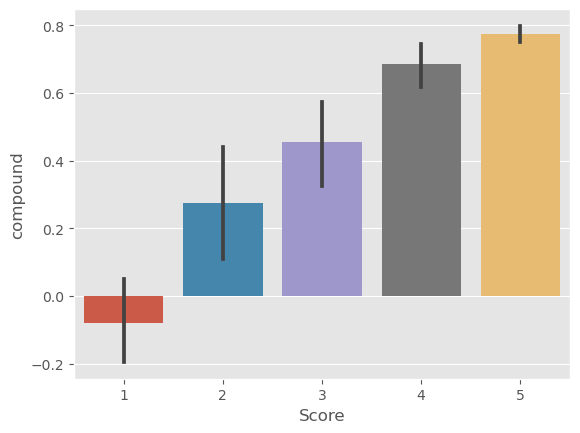

In [16]:
sns.barplot(data = vaders,
            x = 'Score',
            y = 'compound')
axes.set_title('Compound Score by Amazon Star Review')
plt.show()

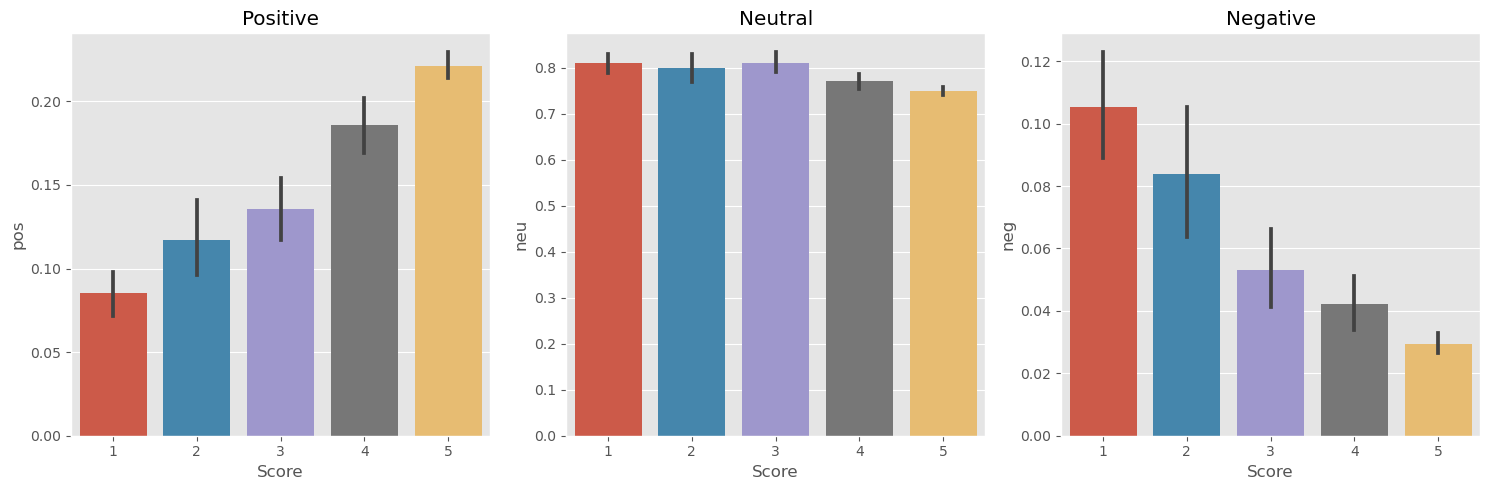

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = vaders,
            x = 'Score',
            y = 'pos',
            ax = axs[0])
axs[0].set_title('Positive')
sns.barplot(data = vaders,
            x = 'Score',
            y = 'neu',
            ax = axs[1])
axs[1].set_title('Neutral')
sns.barplot(data = vaders,
            x = 'Score',
            y = 'neg',
            ax = axs[2])
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [18]:
# Roverta Pretrained Model
# use a model trained of a large corpus of data
# transformer model accounts for the words but also the context related yo oyher words

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

c:\Users\ual-laptop\anaconda3\lib\site-packages\huggingface_hub\file_download.py:127: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ual-laptop\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [20]:
# Run Roberta Model
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0030508344, 'roberta_neu': 0.08110054, 'roberta_pos': 0.9158486}


In [21]:
# Run on entire dataset
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [25]:
# Run polarity score on entire dataset
res = {}
for i, row in tqdm(reviews.iterrows(), total=len(reviews)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)

        # combine both the results
        both = {**vader_result_rename, **roberta_result}
        
        res[myid] = both
    except RuntimeError:
        print(f'Text too large for id {myid}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Text too large for id 83
Text too large for id 187
Text too large for id 529
Text too large for id 540
Text too large for id 746
Text too large for id 863


In [27]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(reviews, how='left')
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

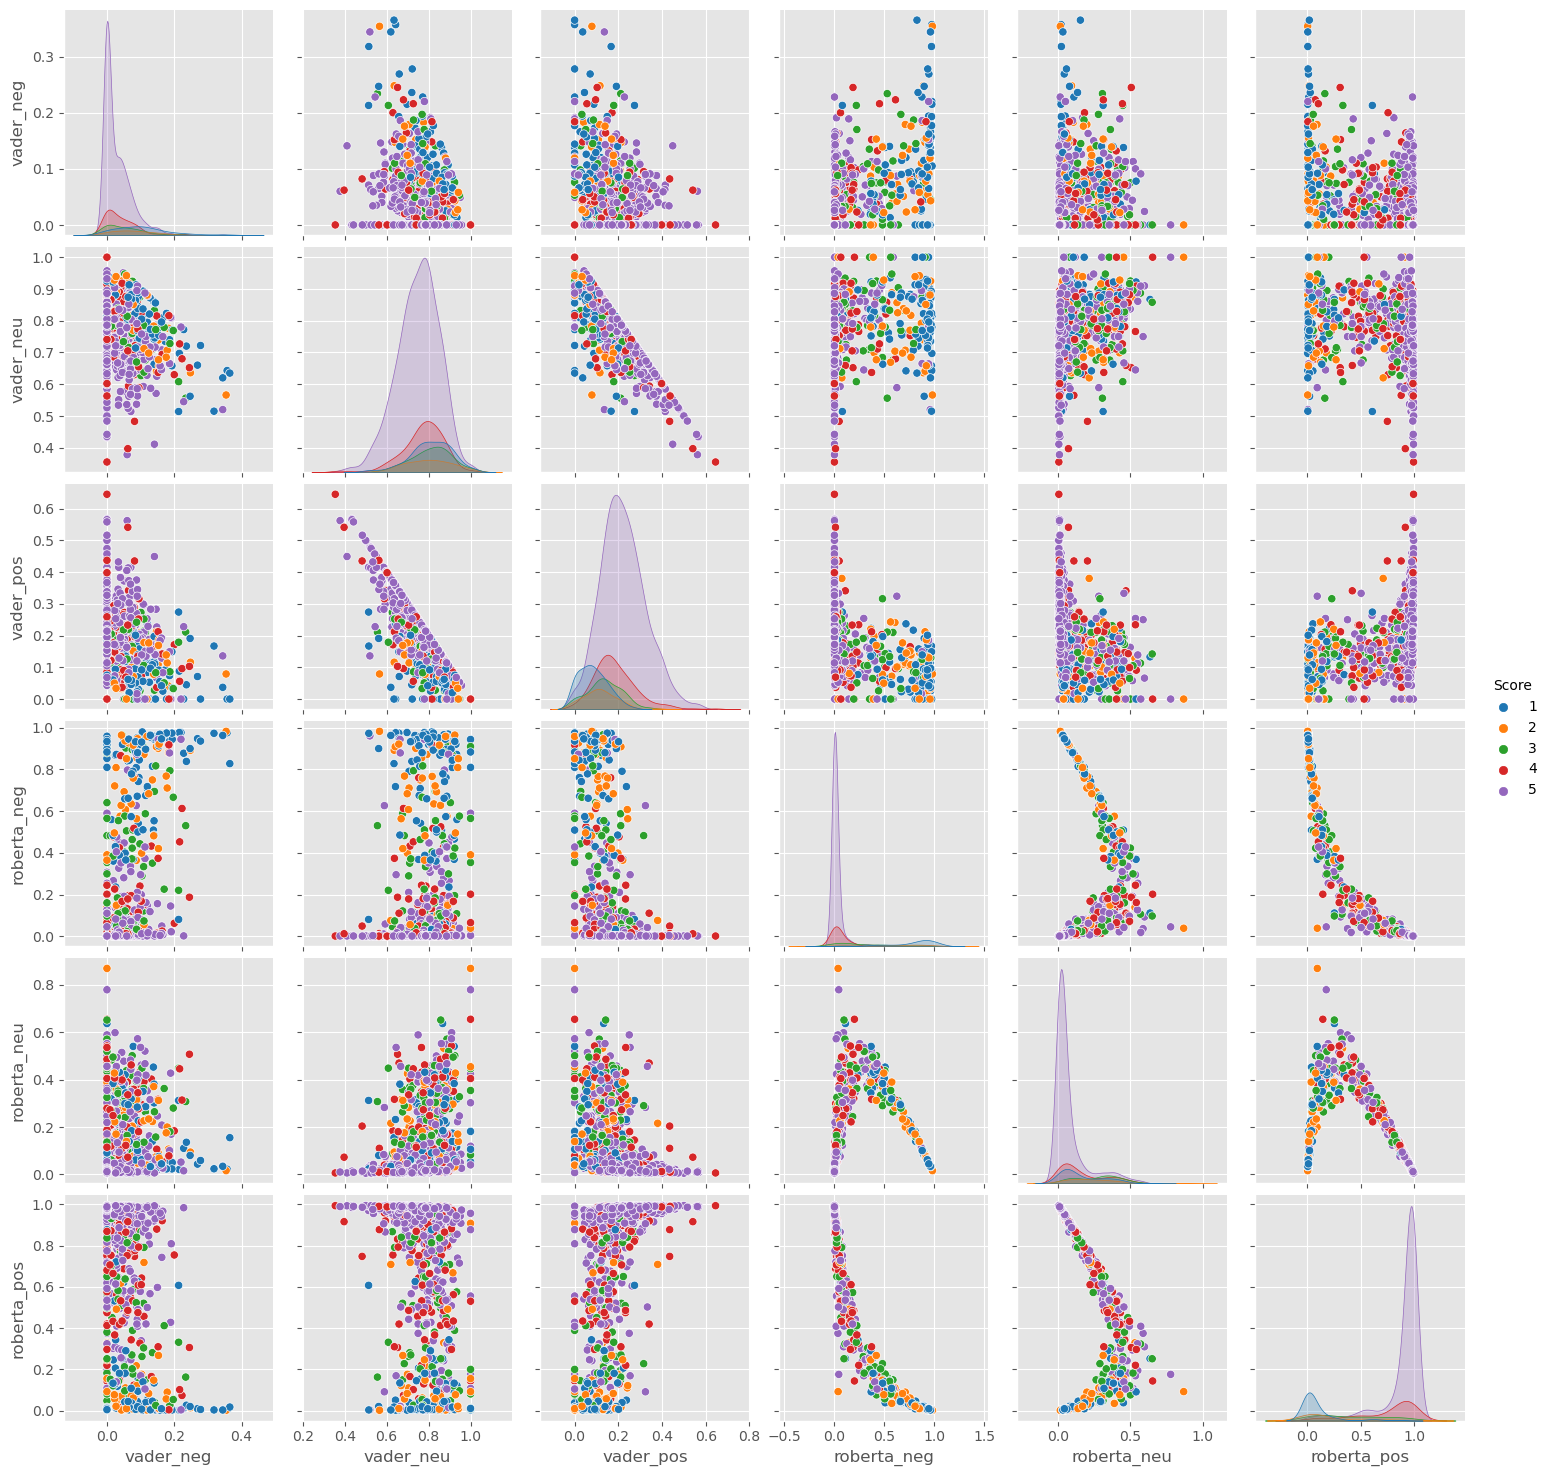

In [28]:
# Compare scores between models
sns.pairplot(data = results_df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
       hue = 'Score',
       palette= 'tab10')
plt.show()

In [29]:
# Review examples
results_df.query('Score == 1') \
                 .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [30]:
# Review examples
results_df.query('Score == 1') \
                 .sort_values('vader_pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [31]:
# negative sentiment 5 star review
# Review examples
results_df.query('Score == 5') \
                 .sort_values('roberta_neg', ascending=False)['Text'].values[0]


'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [32]:
# Review examples
results_df.query('Score == 5') \
                 .sort_values('vader_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [34]:
# hugging face pipeline
# quick and easy way to run sentiment predictions
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [35]:
sent_pipeline("I love pizza")

[{'label': 'POSITIVE', 'score': 0.9997534155845642}]